<h1> Import Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

**Insight**
- Import seluruh libraries yang dibutuhkan

<h1> Data Loading

In [3]:
df = pd.read_csv('D:\DBS Foundation Bootcamp\Machine Learning Terapan\predictive-analysis\dataset\heart_attack_prediction_indonesia.csv')

**Insight**
- Loading data menggunakan pandas dengan path dataset yang sudah di tentukan

<h1> EDA Variable

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             158355 non-null  object 
 12  physical_activit

**Insight**
- Tipe data
    - 17 kolom bertipe numerik (int64 dan float64) → cocok untuk analisis statistik dan pemodelan langsung.
    - 10 kolom bertipe kategorikal (object) → perlu dilakukan encoding sebelum digunakan dalam model ML.

- Target Variabel : heart_attack (integer, kemungkinan 0 atau 1)
    - 0 : Tidak mengalami serangan jantung
    - 1 : Mengalami serangan jantung

In [5]:
df.head()

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1


**Insight**
- Setelah di cek, terlalu banyak kolom yang ada
- Coba hapus yang tidak diperlukan

In [6]:
df = df.drop(['region', 'income_level', 'family_history', 'alcohol_consumption', 'EKG_results', 'participated_in_free_screening'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   age                       158355 non-null  int64  
 1   gender                    158355 non-null  object 
 2   hypertension              158355 non-null  int64  
 3   diabetes                  158355 non-null  int64  
 4   cholesterol_level         158355 non-null  int64  
 5   obesity                   158355 non-null  int64  
 6   waist_circumference       158355 non-null  int64  
 7   smoking_status            158355 non-null  object 
 8   physical_activity         158355 non-null  object 
 9   dietary_habits            158355 non-null  object 
 10  air_pollution_exposure    158355 non-null  object 
 11  stress_level              158355 non-null  object 
 12  sleep_hours               158355 non-null  float64
 13  blood_pressure_systolic   158355 non-null  i

**Insight**
- Kolom seperti region, income_level, alcohol_consumption, EKG_results, participated_in_free_screening, dll. telah dihapus.
- Dataset kini lebih fokus pada faktor klinis, gaya hidup, dan psikologis, yang lebih relevan untuk prediksi serangan jantung.



In [7]:
df.head()

,age,gender,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,smoking_status,physical_activity,dietary_habits,...,sleep_hours,blood_pressure_systolic,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,previous_heart_disease,medication_usage,heart_attack
0,60,Male,0,1,211,0,83,Never,High,Unhealthy,...,5.970603,113,62,173,48,121,101,0,0,0
1,53,Female,0,0,208,0,106,Past,Moderate,Healthy,...,5.643813,132,76,70,58,83,138,1,0,0
2,62,Female,0,0,231,1,112,Past,Moderate,Healthy,...,6.336197,116,74,118,69,130,171,0,1,1
3,73,Male,1,0,202,0,82,Never,Moderate,Unhealthy,...,7.912990,136,65,98,52,85,146,0,1,0
4,52,Male,1,0,232,0,89,Current,Moderate,Unhealthy,...,3.252338,127,75,104,59,127,139,1,0,1


**Insight**
- Karena adanya beberapa data yang nilainya 0/1 di dalam type data integer, maka ubah terlebih dahulu menjadi type category

In [8]:
binary_categorical_cols = [
    'hypertension', 'diabetes', 'obesity', 
    'previous_heart_disease', 'medication_usage', 'heart_attack'
]

for col in binary_categorical_cols:
    df[col] = df[col].astype('category')

**Insight**
- Mengubah tipe data integer pada kolom yang bersifat category yg memiliki nilai 1 / 0
- Meningkatkan kompatibilitas visualisasi, seperti saat membuat plot countplot, catplot, atau groupby.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   age                       158355 non-null  int64   
 1   gender                    158355 non-null  object  
 2   hypertension              158355 non-null  category
 3   diabetes                  158355 non-null  category
 4   cholesterol_level         158355 non-null  int64   
 5   obesity                   158355 non-null  category
 6   waist_circumference       158355 non-null  int64   
 7   smoking_status            158355 non-null  object  
 8   physical_activity         158355 non-null  object  
 9   dietary_habits            158355 non-null  object  
 10  air_pollution_exposure    158355 non-null  object  
 11  stress_level              158355 non-null  object  
 12  sleep_hours               158355 non-null  float64 
 13  blood_pressure_systolic   158

**Insight**
- Data sudah terubah

In [10]:
df.duplicated().sum()

0

<h1> EDA Missing Values dan Outliers

In [11]:
# Check for missing values
df.isnull().sum()

age                         0
gender                      0
hypertension                0
diabetes                    0
cholesterol_level           0
obesity                     0
waist_circumference         0
smoking_status              0
physical_activity           0
dietary_habits              0
air_pollution_exposure      0
stress_level                0
sleep_hours                 0
blood_pressure_systolic     0
blood_pressure_diastolic    0
fasting_blood_sugar         0
cholesterol_hdl             0
cholesterol_ldl             0
triglycerides               0
previous_heart_disease      0
medication_usage            0
heart_attack                0
dtype: int64

**Insight**
- Tidak ada data yang missing values atau kosong

In [12]:
numeric_features = [
    'age',
    'cholesterol_level',
    'waist_circumference',
    'sleep_hours',
    'blood_pressure_systolic',
    'blood_pressure_diastolic',
    'fasting_blood_sugar',
    'cholesterol_hdl',
    'cholesterol_ldl',
    'triglycerides'
]

categorical_features = [
    'gender',
    'smoking_status',
    'physical_activity',
    'dietary_habits',
    'air_pollution_exposure',
    'stress_level',
    'hypertension',
    'diabetes',
    'obesity',
    'previous_heart_disease',
    'medication_usage'
]

**Insight** 
- Sebelum memulai ke tahap outliers, perlu membuat variabel untuk membedakan numeric dan categoric

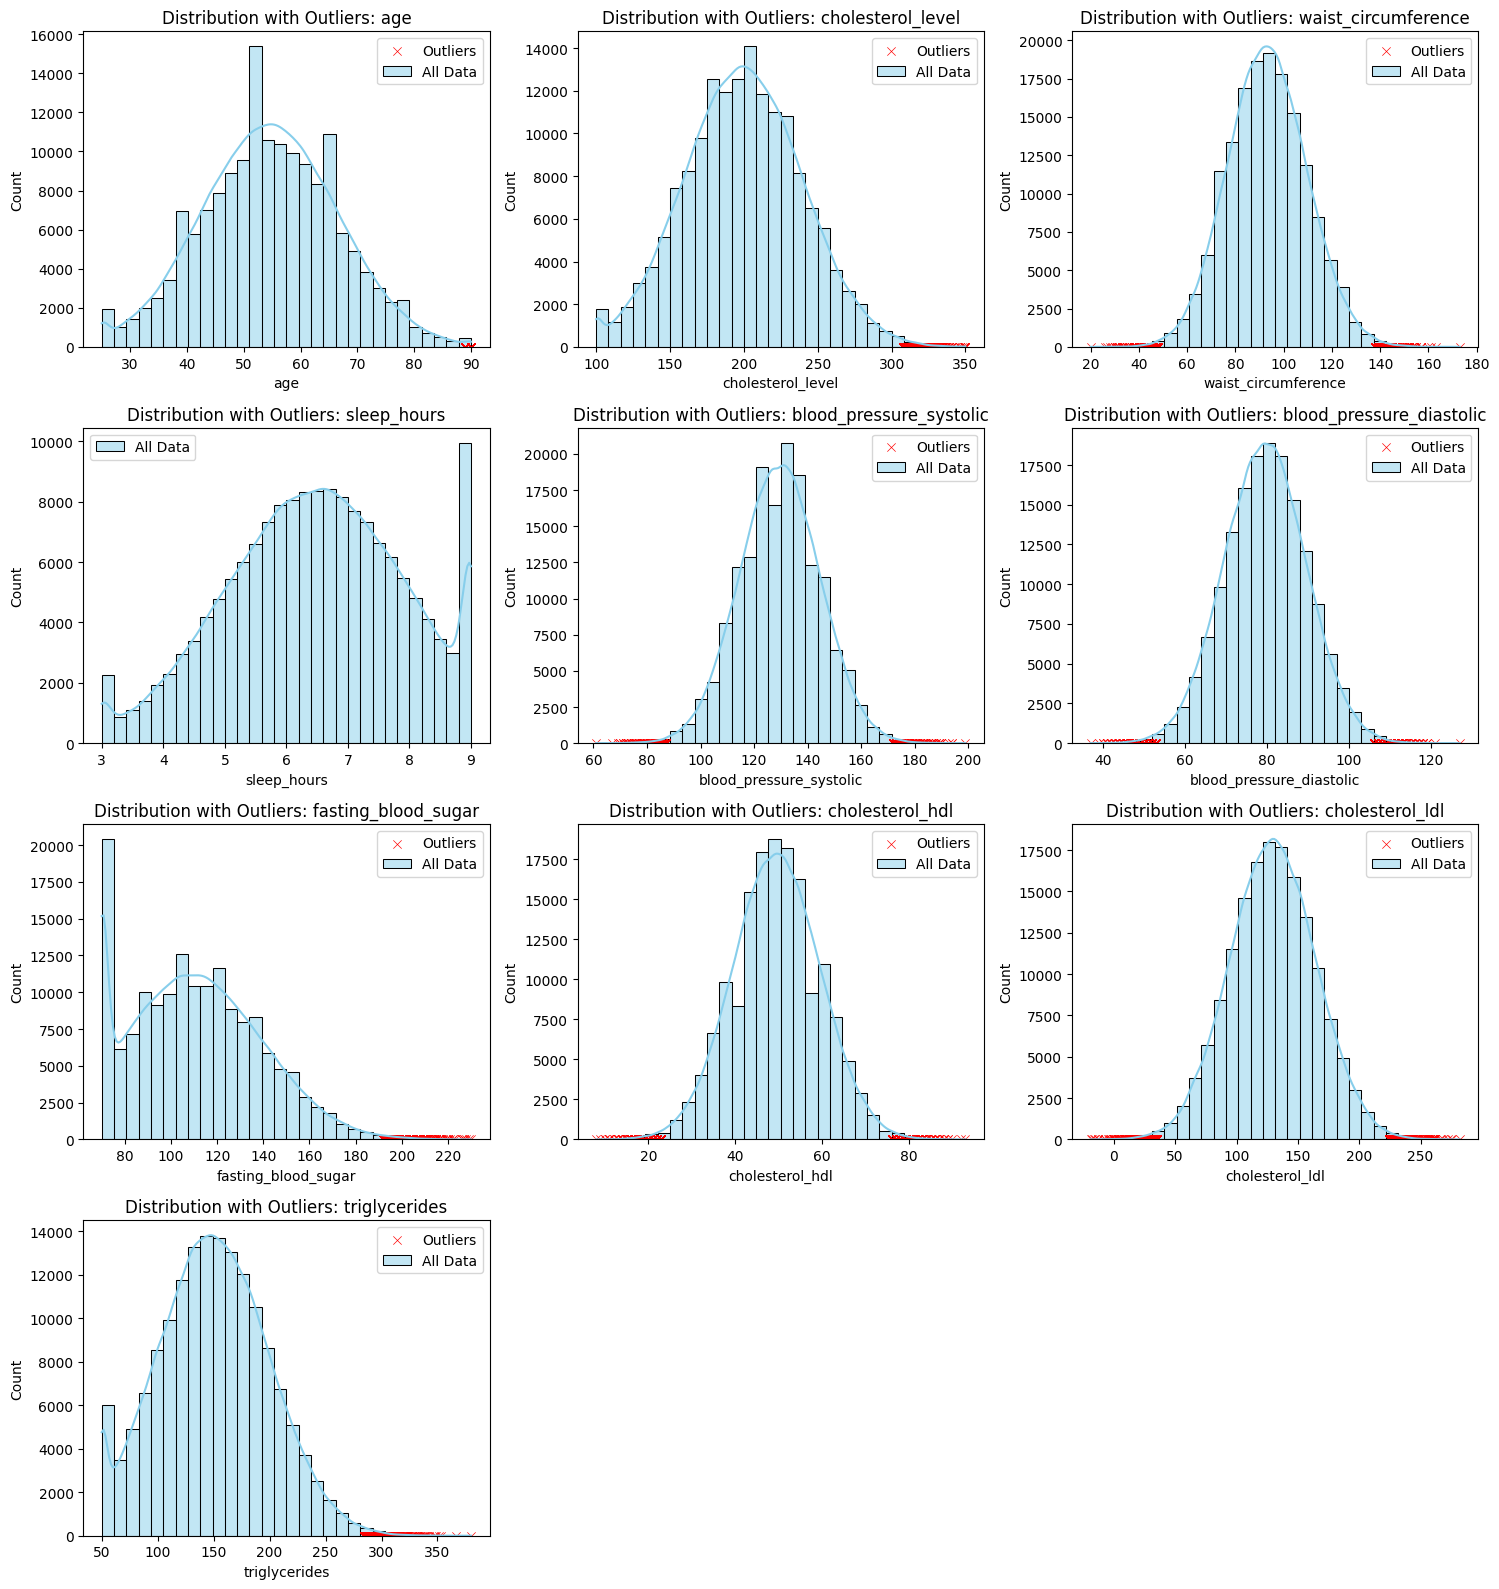

In [13]:
# Fungsi deteksi outlier dengan IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Simpan outlier untuk tiap kolom
outlier_summary = {col: detect_outliers_iqr(df, col) for col in numeric_features}

# Buat visualisasi
n_features = len(numeric_features)
n_cols = 3  # Misalnya 3 kolom per baris
n_rows = int(np.ceil(n_features / n_cols))

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(numeric_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, color='skyblue', bins=30, label='All Data')

    # Plot outliers jika ada
    if not outlier_summary[col].empty:
        sns.scatterplot(
            x=outlier_summary[col][col],
            y=[0.5] * len(outlier_summary[col]),
            color='red',
            label='Outliers',
            marker='x'
        )

    plt.title(f'Distribution with Outliers: {col}')
    plt.xlabel(col)
    plt.legend()

plt.tight_layout()
plt.show()

**Insight**
- Setelah dilakukan deteksi outliers menggunakan IQR didapatkan hasil visualisasi seperti di atas. (warna merah muda) dan sesudah (warna hijau) penghapusan outlier. Penghapusan outlier bertujuan untuk memperbaiki distribusi data dan menghindari pengaruh negatif nilai ekstrem terhadap model.
- age: Distribusi sedikit miring ke kanan, menunjukkan outlier pada usia tinggi (>80).
- cholesterol_level: Distribusi normal, namun outlier terlihat di atas 300 mg/dL.
- waist_circumference: Distribusi normal dengan outlier di atas 150 cm.
- sleep_hours: Terlihat outlier pada jam tidur ekstrem (<4 dan >9 jam).
- blood_pressure_systolic & diastolic: Distribusi mendekati normal, outlier muncul di atas 180/120 mmHg.
- fasting_blood_sugar: Skew kanan dengan banyak outlier di atas 160 mg/dL.
- cholesterol_hdl, ldl: Distribusi normal, outlier di atas 80 untuk HDL dan >200 untuk LDL.
- triglycerides: Distribusi skew kanan dengan outlier di atas 300 mg/dL.

In [14]:
def remove_outliers_iqr(data, columns):
    df_clean = data.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

df_no_outliers = remove_outliers_iqr(df, numeric_features)

**Insight**
- Kode diatas untuk menghapus outliers dan disimpan ke df_no_outliers

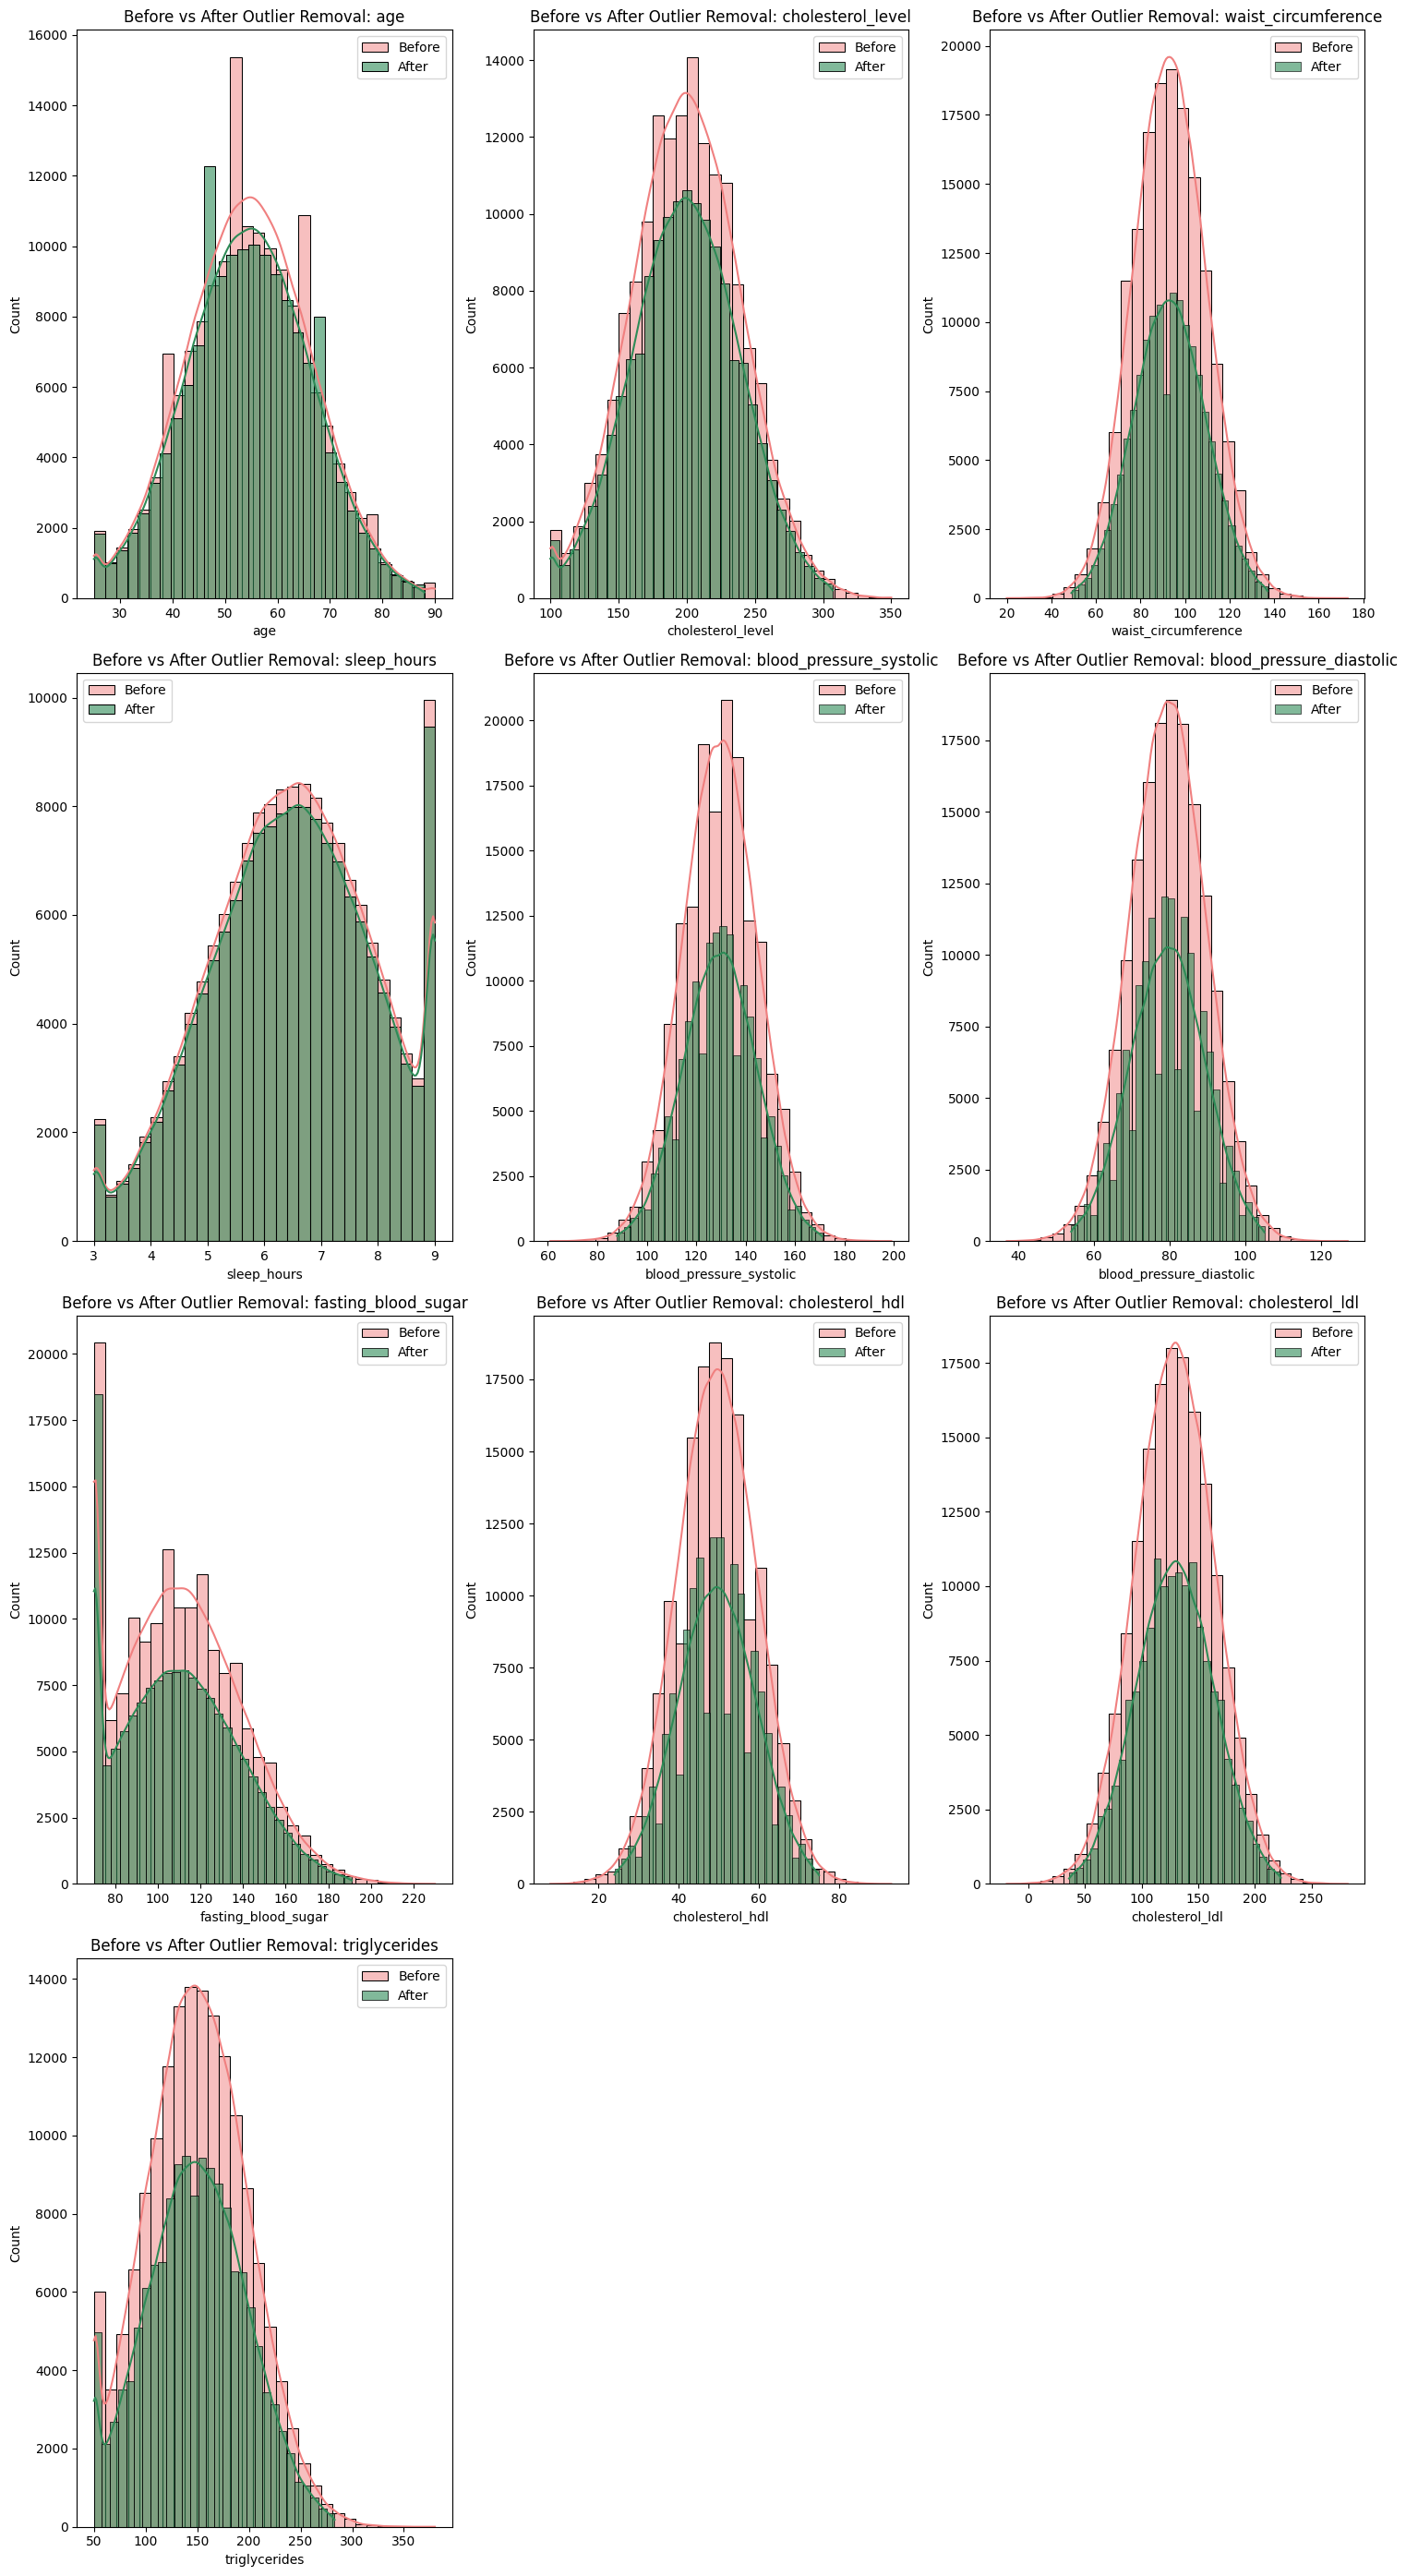

In [15]:
# Buat subplot untuk data sebelum & sesudah
n_features = len(numeric_features)
n_cols = 3
n_rows = int(np.ceil(n_features / n_cols))

plt.figure(figsize=(n_cols * 5, n_rows * 7))

for i, col in enumerate(numeric_features, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Histogram sebelum
    sns.histplot(df[col], kde=True, color='lightcoral', bins=30, label='Before')
    
    # Histogram sesudah
    sns.histplot(df_no_outliers[col], kde=True, color='seagreen', bins=30, label='After', alpha=0.6)

    plt.title(f'Before vs After Outlier Removal: {col}')
    plt.xlabel(col)
    plt.legend()

plt.tight_layout()
plt.show()

**Insight**
- Setelah dilakukan penghapusan, dapat dilihat signifikan data data yang ekstrem sudah terhapus

<h1> EDA Univariate

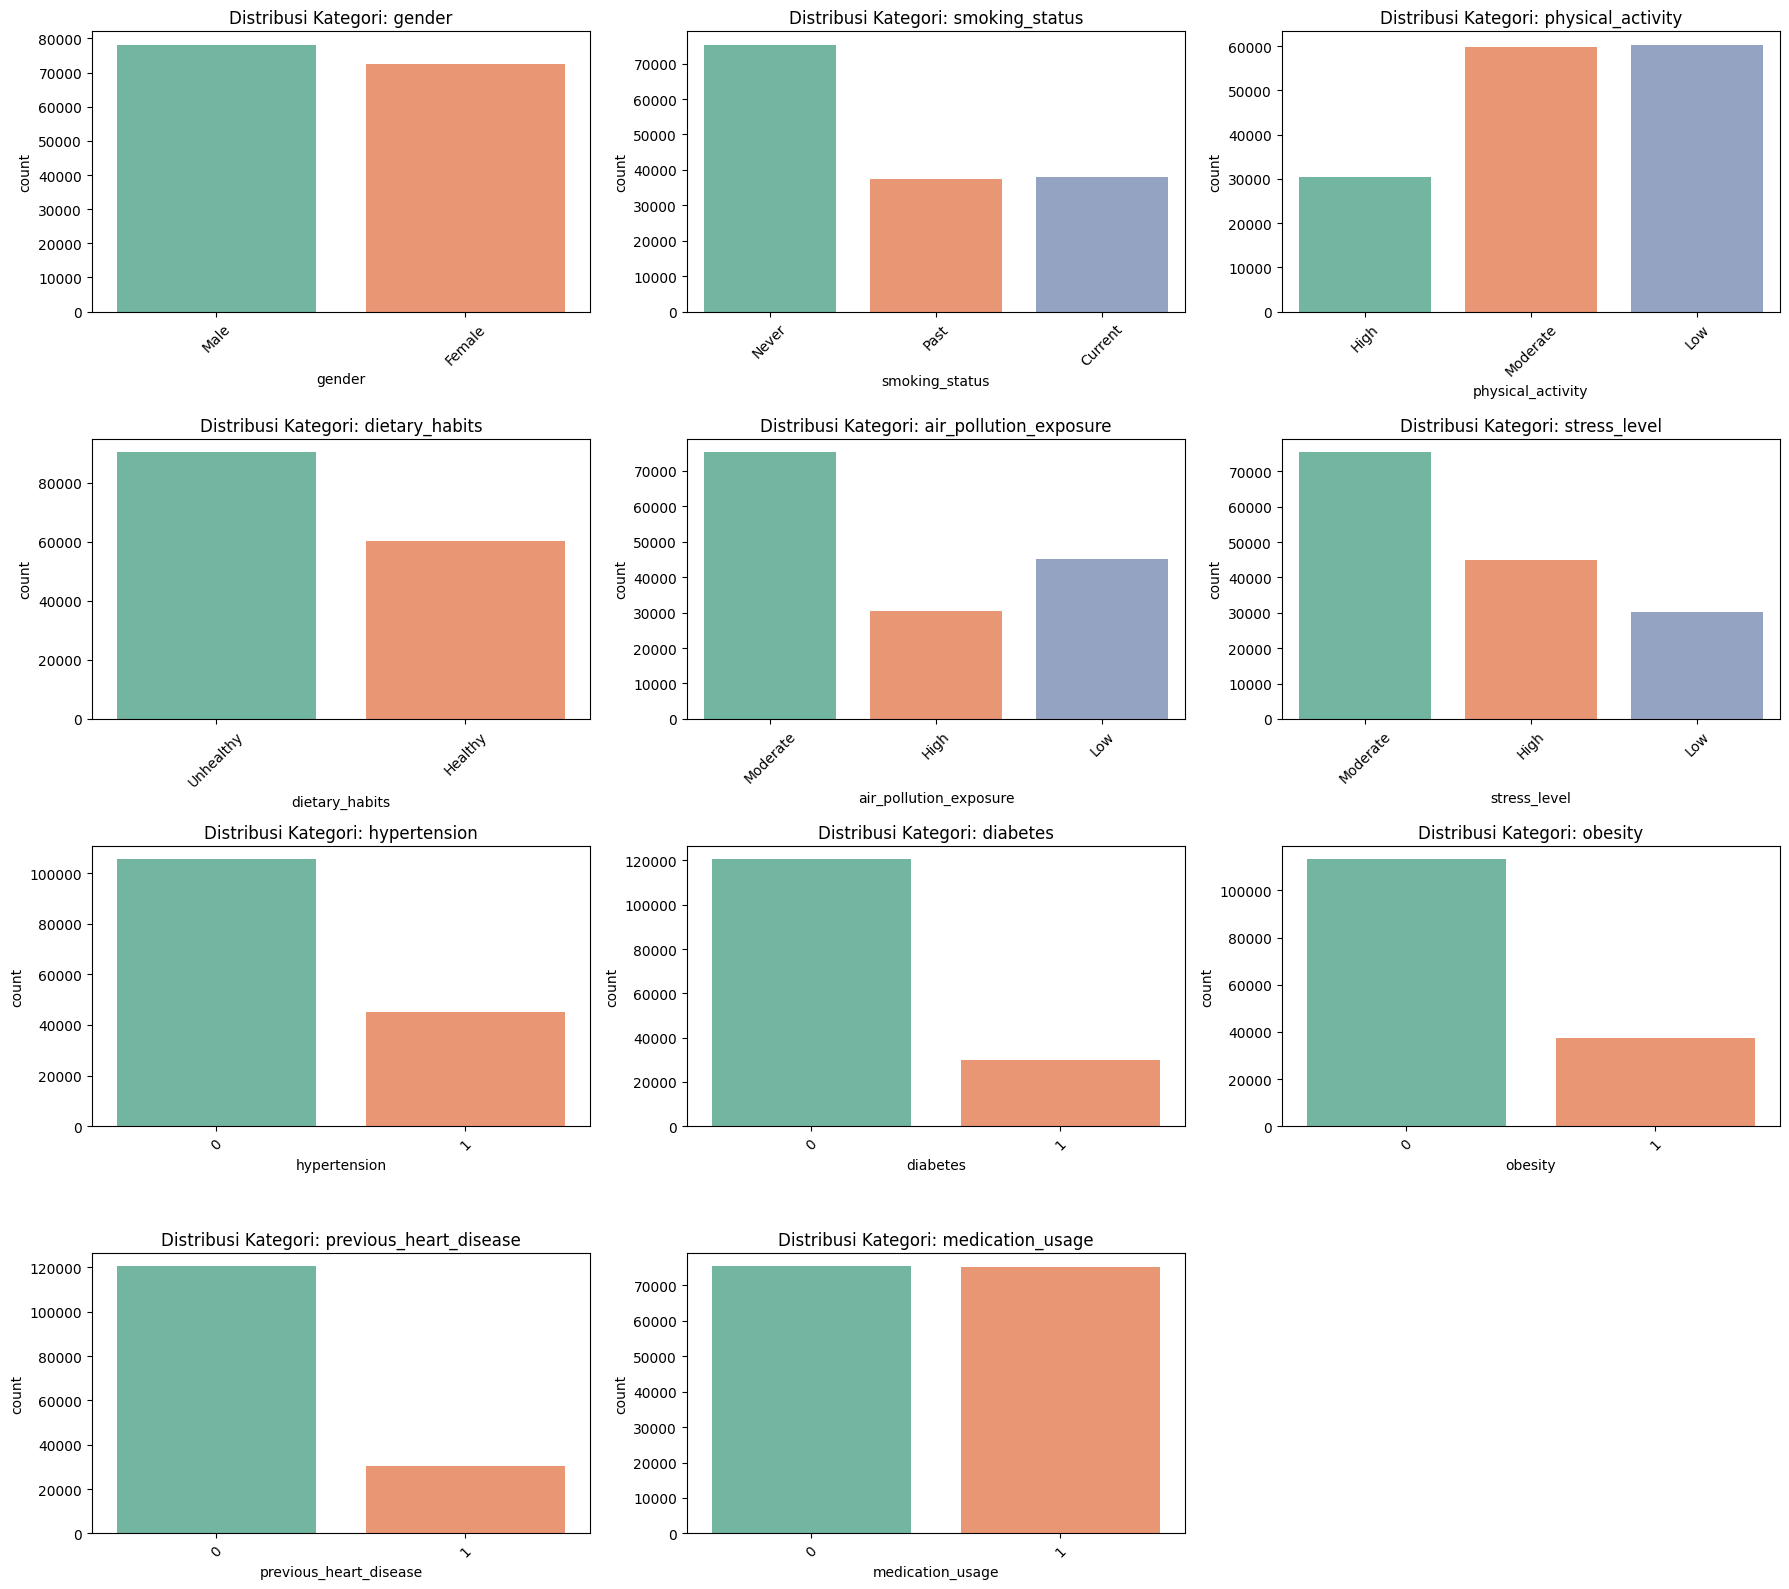

In [16]:
import math

n_features = len(categorical_features)
n_cols = 3  # kamu bisa atur sesuai lebar yang diinginkan
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()  # agar indexing jadi 1 dimensi

for i, col in enumerate(categorical_features):
    sns.countplot(x=col, data=df_no_outliers, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Distribusi Kategori: {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Untuk subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Insight**
- gender
    - Distribusi gender relatif seimbang antara pria dan wanita.
- smoking_status
    - Kategori terbanyak adalah perokok yang tidak pernah merokok, diikuti oleh perokok saat ini dan mantan perokok.
- physical_activity
    - Mayoritas individu memiliki tingkat aktivitas fisik sedang dan rendah, sedangkan aktivitas tinggi hanya sebagian kecil.
- dietary_habits
    - Sebagian besar peserta memiliki kebiasaan makan yang tidak sehat dibandingkan yang sehat.
- air_pollution_exposure
    - Paparan polusi udara sedang paling dominan, diikuti oleh rendah dan tinggi.
- stress_level
    - Mayoritas individu memiliki tingkat stres sedang, dengan jumlah yang lebih sedikit pada tingkat tinggi dan rendah.
- hypertension, diabetes, obesity, previous_heart_disease, medication_usage
    - Untuk variabel biner ini (0: tidak, 1: ya), mayoritas responden tidak memiliki hipertensi, diabetes, obesitas, riwayat penyakit jantung, ataupun penggunaan obat.

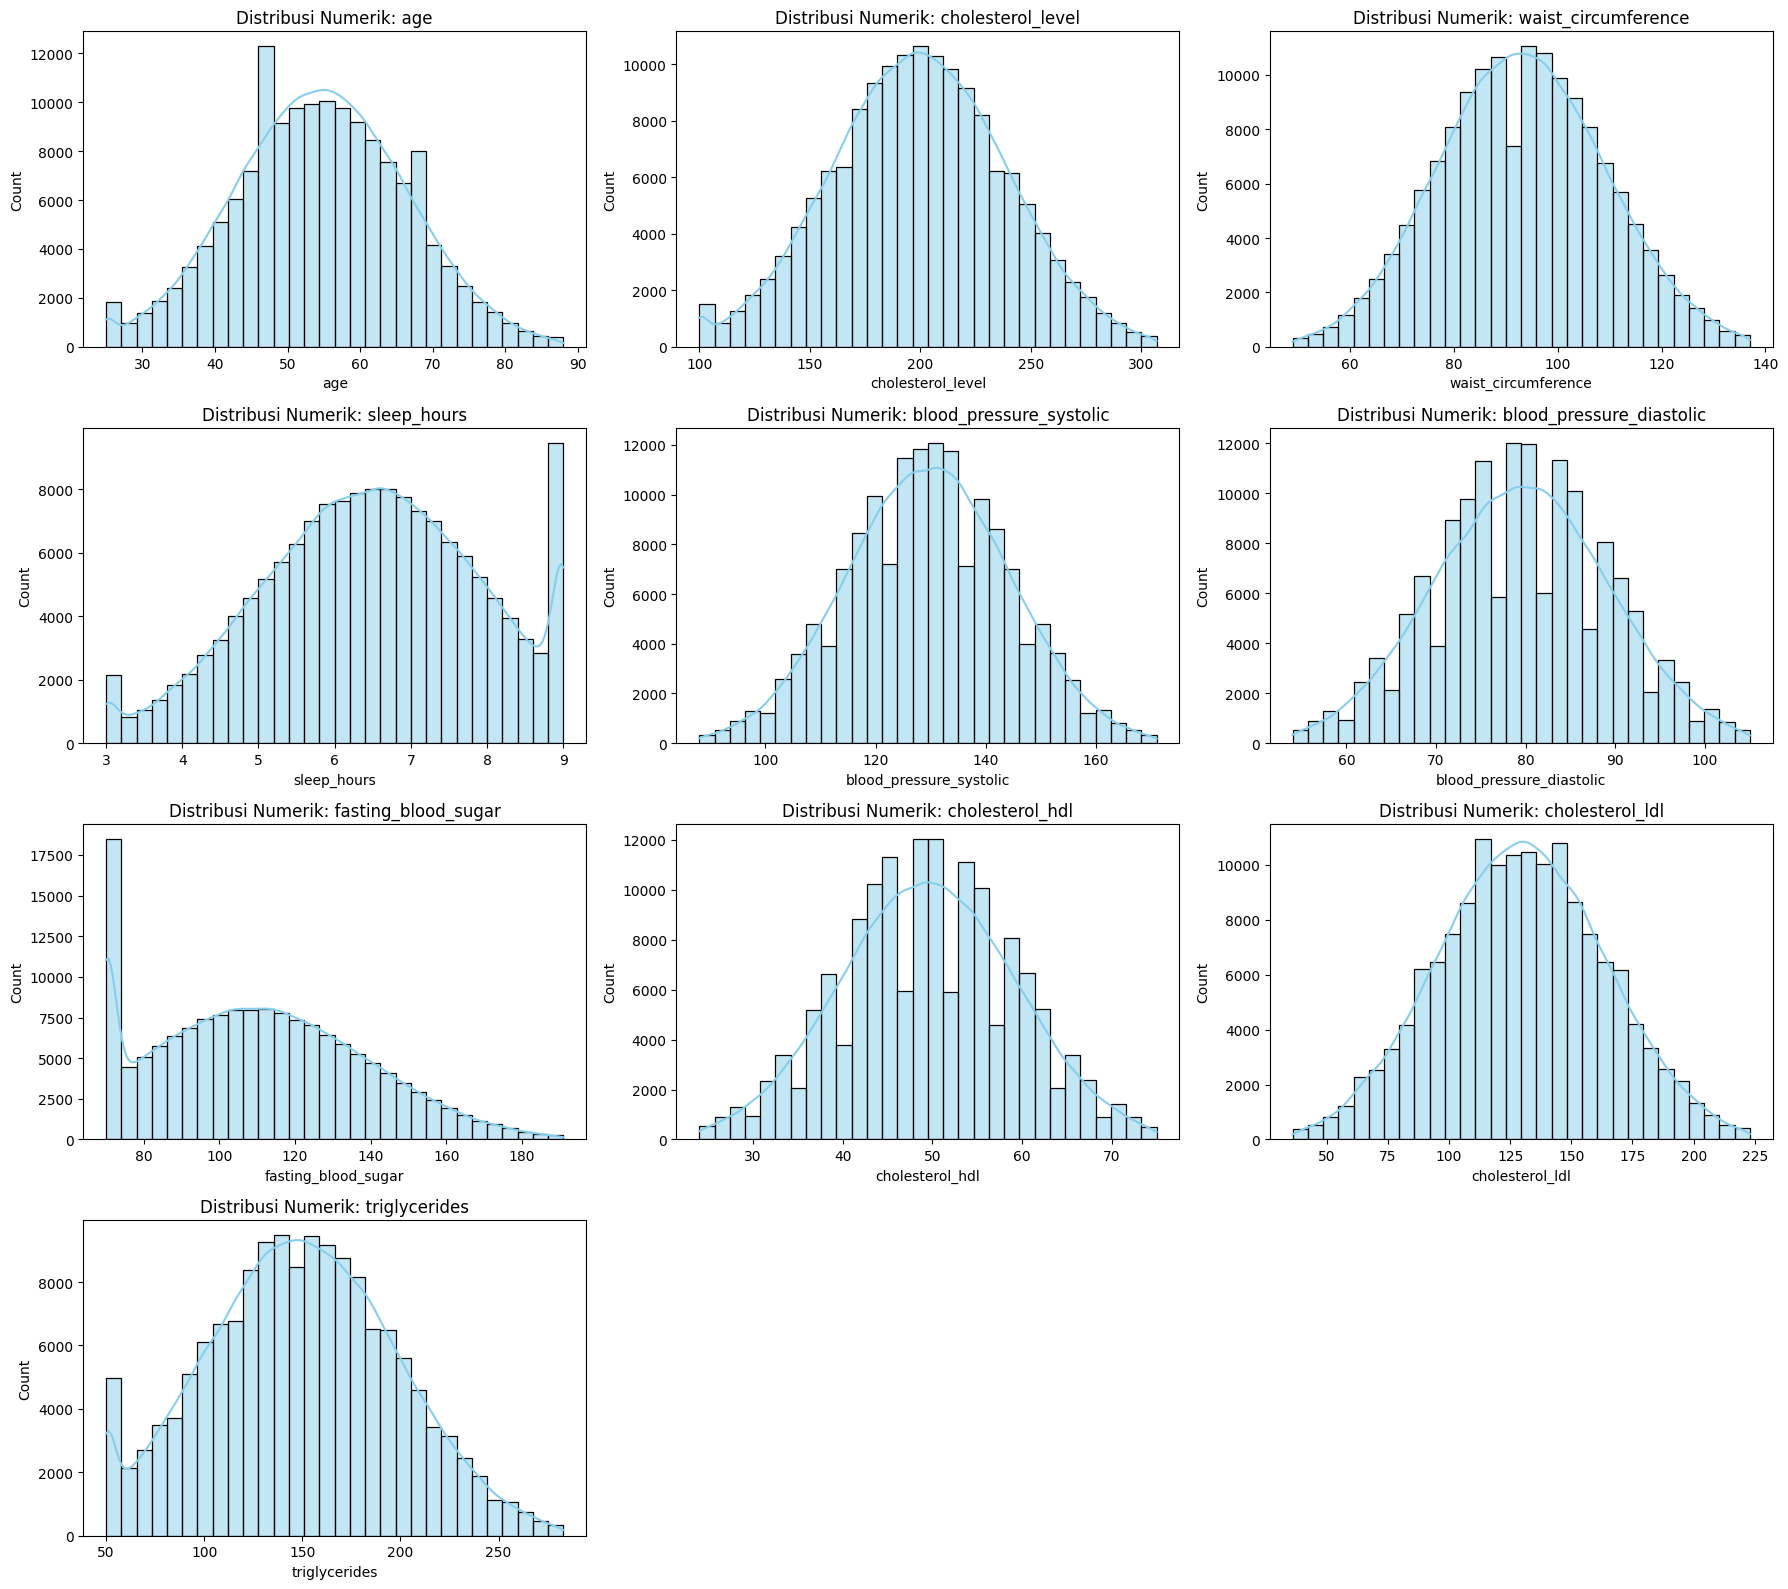

In [17]:
n_features = len(numeric_features)
n_cols = 3  # atur sesuai selera, misal 3 kolom
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_features):
    sns.histplot(df_no_outliers[col], kde=True, bins=30, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribusi Numerik: {col}')
    axes[i].set_xlabel(col)

# Hapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Insight**
- age
    - Distribusi usia membentuk pola mirip distribusi normal, puncak berada di sekitar usia 60 tahun.
- cholesterol_level
    - Distribusi cenderung simetris dengan puncak sekitar 200 mg/dL.
- waist_circumference
    - Distribusi normal dengan puncak sekitar 90–100 cm.
- sleep_hours
    - Distribusi tidak sepenuhnya normal, ada puncak di sekitar 6–8 jam dengan kenaikan tajam di 9 jam.
- blood_pressure_systolic dan blood_pressure_diastolic
    - Keduanya memiliki distribusi yang relatif normal dengan rata-rata sistolik di sekitar 130 mmHg dan diastolik di sekitar 80 mmHg.
- fasting_blood_sugar
    - Distribusi condong ke kanan (skewed), dengan sebagian besar nilai antara 90–120 mg/dL.
- cholesterol_hdl, cholesterol_ldl
    - Kedua variabel kolesterol menunjukkan distribusi mendekati normal, dengan HDL sekitar 50 mg/dL dan LDL sekitar 130 mg/dL.
- triglycerides
    - Distribusi sedikit skewed ke kanan, sebagian besar nilai berkisar di bawah 200 mg/dL.

<h1> EDA Multivariate

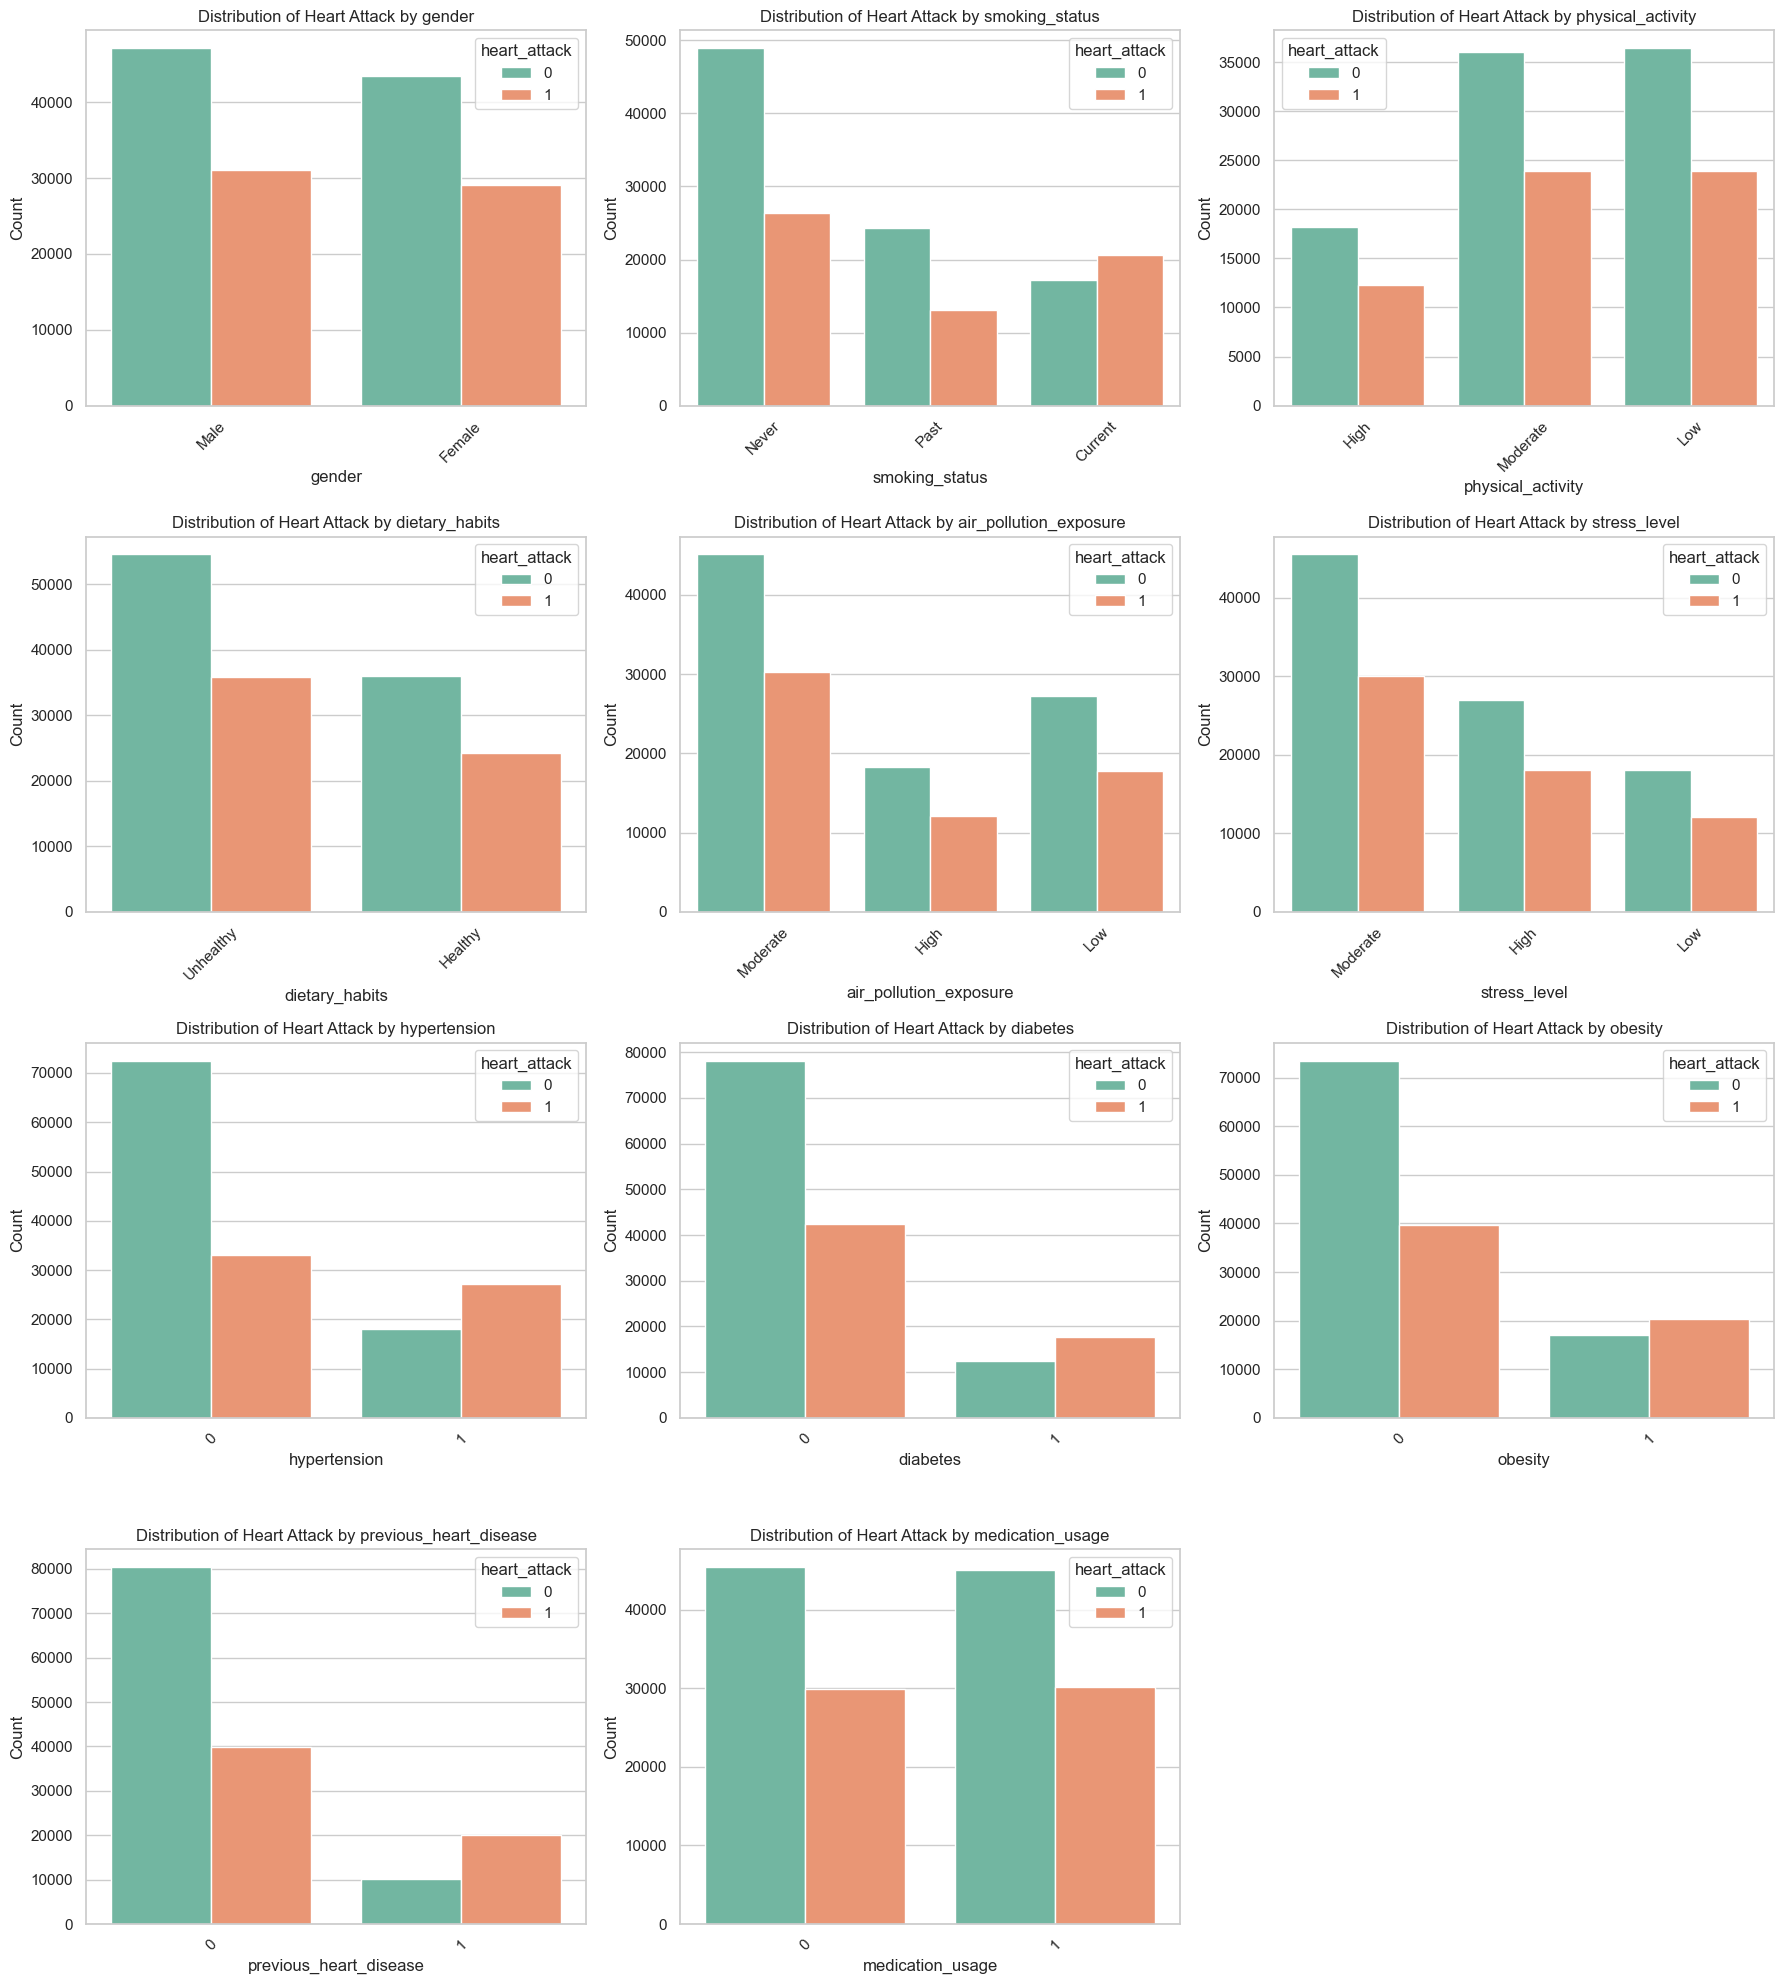

In [18]:
sns.set(style="whitegrid")

n_features = len(categorical_features)
n_cols = 3  # bisa diubah
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(data=df_no_outliers, x=col, hue="heart_attack", palette='Set2', ax=axes[i])
    axes[i].set_title(f'Distribution of Heart Attack by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

# Hapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Insight**
- Gender:
    - Laki-laki memiliki jumlah serangan jantung lebih tinggi dibanding perempuan.
    - Risiko serangan jantung tampaknya lebih tinggi pada pria, konsisten dengan studi medis.
- Smoking Status:
    - Individu yang merokok saat ini (current) memiliki jumlah serangan jantung yang tinggi relatif terhadap jumlah total mereka.
    - Yang tidak pernah merokok (never) memiliki jumlah kasus serangan jantung yang jauh lebih kecil.
- Physical Activity:
    - Aktivitas fisik yang tinggi dikaitkan dengan lebih sedikit kasus serangan jantung.
    - Yang rendah memiliki proporsi kasus serangan jantung lebih tinggi, menunjukkan aktivitas fisik rendah sebagai faktor risiko.
- Dietary Habits:
    - Individu dengan pola makan sehat memiliki jumlah serangan jantung lebih rendah.
    - Sebaliknya, yang memiliki pola makan tidak sehat (unhealthy) menunjukkan jumlah kasus yang lebih besar.
- Air Pollution Exposure:
    - Paparan tinggi terhadap polusi udara cenderung memiliki lebih banyak kasus serangan jantung.
    - Menunjukkan bahwa kualitas lingkungan juga berdampak pada kesehatan jantung.
- Stress Level:
    - Tingkat stres tinggi berkorelasi dengan jumlah kasus serangan jantung yang lebih tinggi dibandingkan yang stresnya rendah.
- Hypertension, Diabetes, Obesity:
    - Semua kondisi ini menunjukkan jumlah serangan jantung yang jauh lebih tinggi pada kelompok dengan kondisi tersebut dibandingkan yang tidak.
    - Ini konsisten dengan faktor risiko klinis yang diketahui.
- Previous Heart Disease:
    - Riwayat penyakit jantung sebelumnya sangat mempengaruhi, jumlah serangan jantung jauh lebih besar pada yang memiliki riwayat ini
- Medication Usage:
    - Menariknya, jumlah serangan jantung tetap tinggi baik pada yang menggunakan maupun tidak menggunakan obat, menunjukkan bahwa pengobatan tidak selalu cukup untuk pencegahan tanpa pengelolaan faktor risiko lainnya.

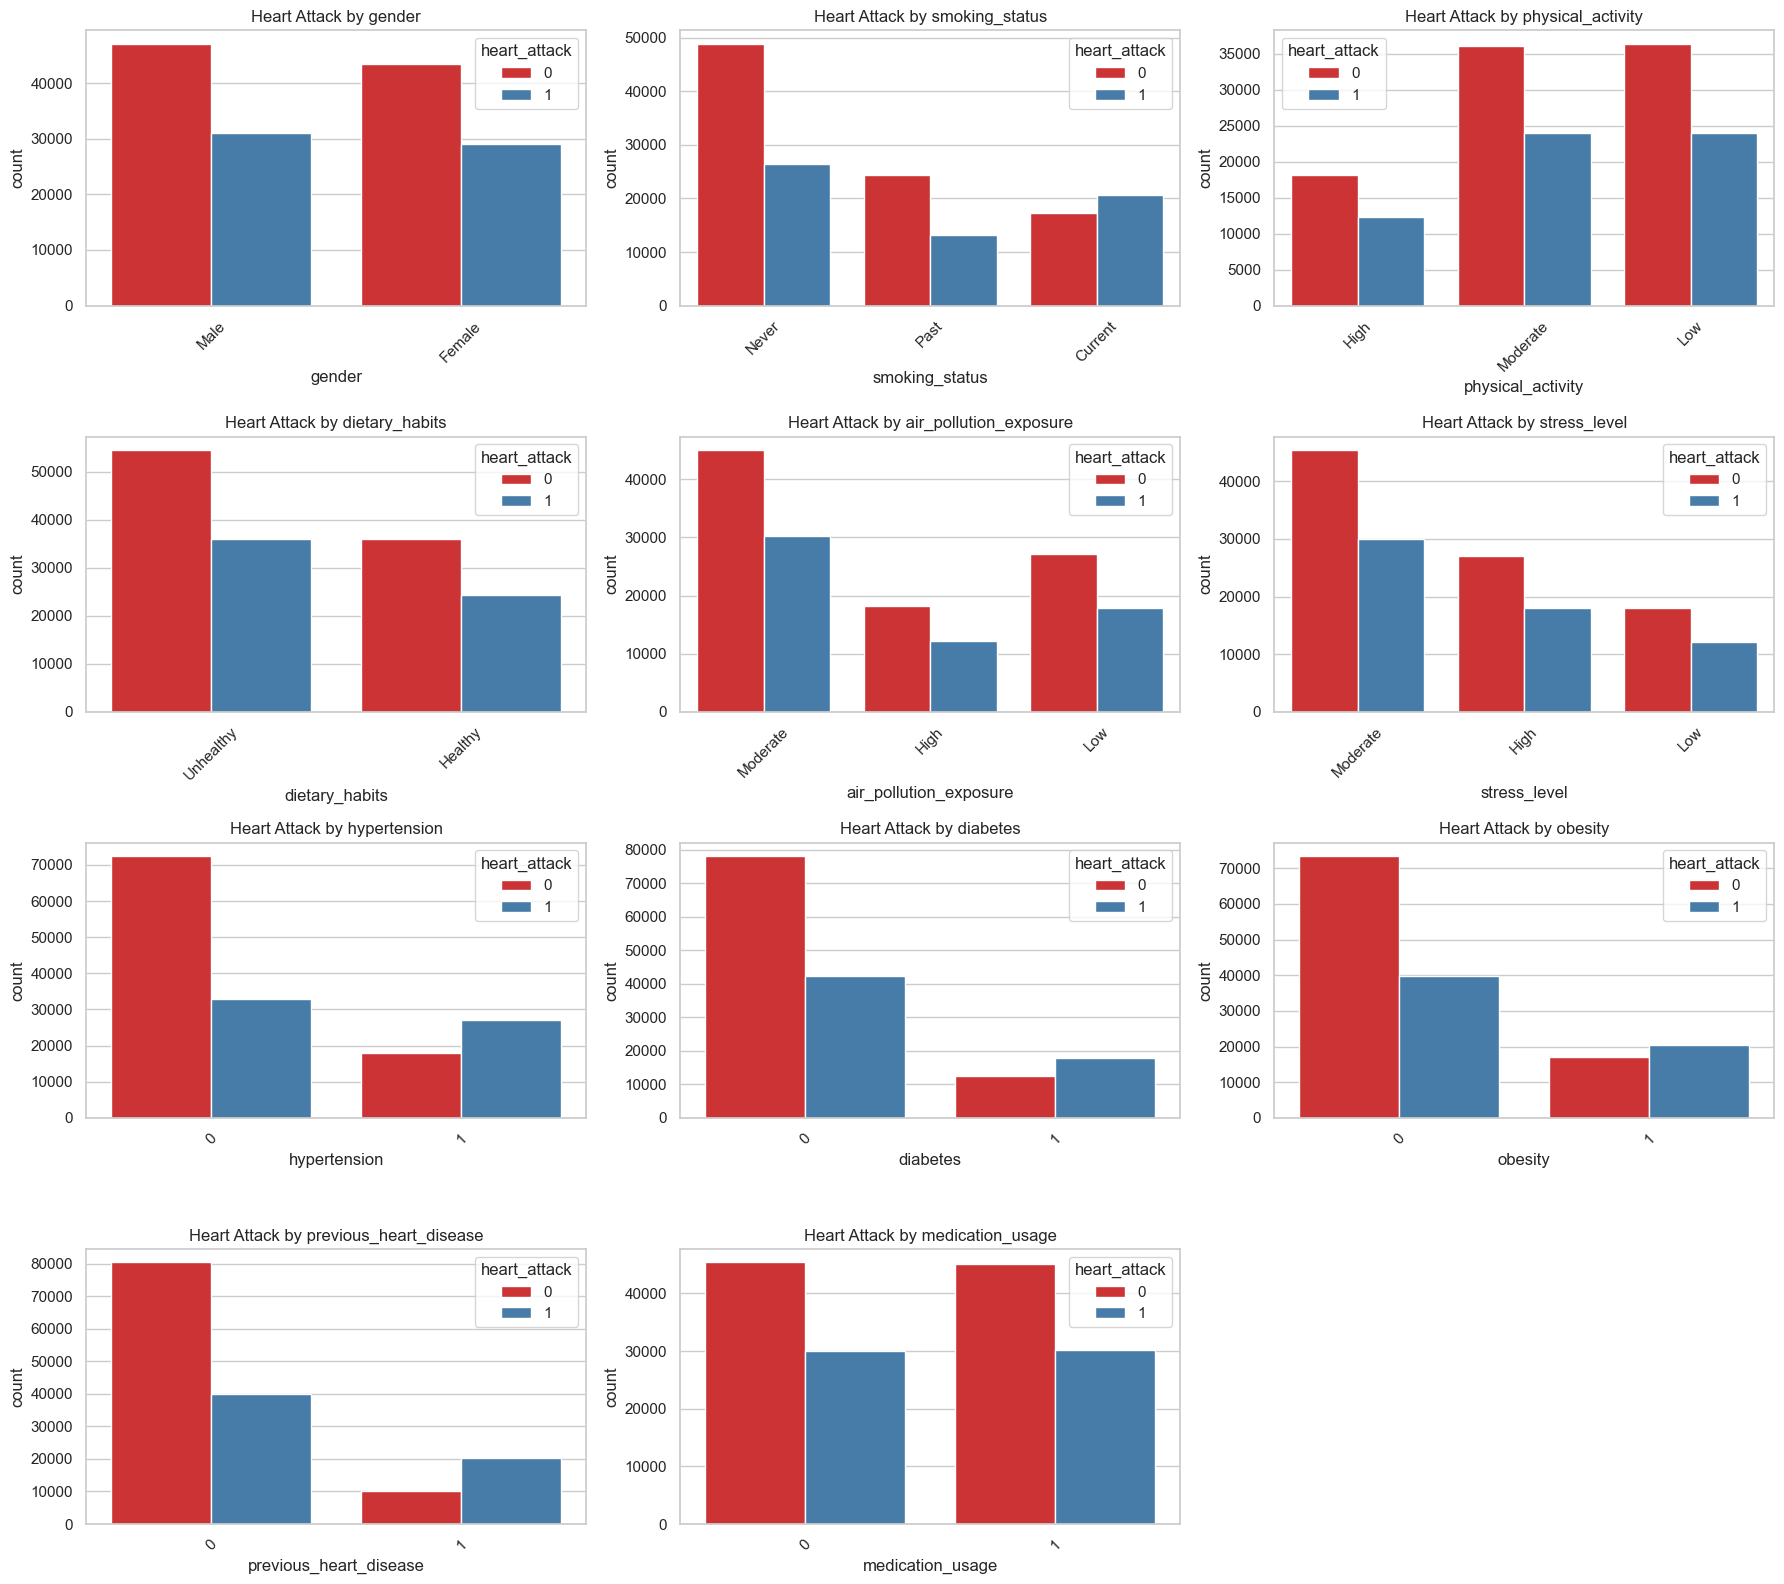

In [19]:
n_features = len(categorical_features)
n_cols = 3  # atur sesuai keinginan
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(x=col, hue='heart_attack', data=df_no_outliers, palette='Set1', ax=axes[i])
    axes[i].set_title(f'Heart Attack by {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Menghapus subplot kosong jika ada
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Insight**
- Age: Pasien dengan serangan jantung cenderung berada di rentang usia yang lebih tinggi.
- Blood Pressure: Tekanan darah sistolik dan diastolik yang lebih tinggi kemungkinan besar berkaitan dengan serangan jantung.
- Sleep Hours: Jam tidur yang sangat rendah atau tidak teratur mungkin berkontribusi terhadap peningkatan risiko.
- Cholesterol LDL/HDL & Triglycerides: Profil lipid abnormal biasanya memperbesar kemungkinan serangan jantung.

In [20]:
corr = df_no_outliers.select_dtypes(include=['number']).corr()
print(corr)

                               age  cholesterol_level  waist_circumference  \
age                       1.000000          -0.003541             0.001111   
cholesterol_level        -0.003541           1.000000            -0.001002   
waist_circumference       0.001111          -0.001002             1.000000   
sleep_hours               0.001124           0.002972             0.001030   
blood_pressure_systolic  -0.001220          -0.002805             0.000171   
blood_pressure_diastolic  0.000806           0.001627             0.002875   
fasting_blood_sugar       0.000860          -0.001064             0.004223   
cholesterol_hdl           0.000905           0.002785            -0.003137   
cholesterol_ldl           0.000990           0.002474            -0.001037   
triglycerides             0.001138           0.000649             0.001723   

                          sleep_hours  blood_pressure_systolic  \
age                          0.001124                -0.001220   
cholester

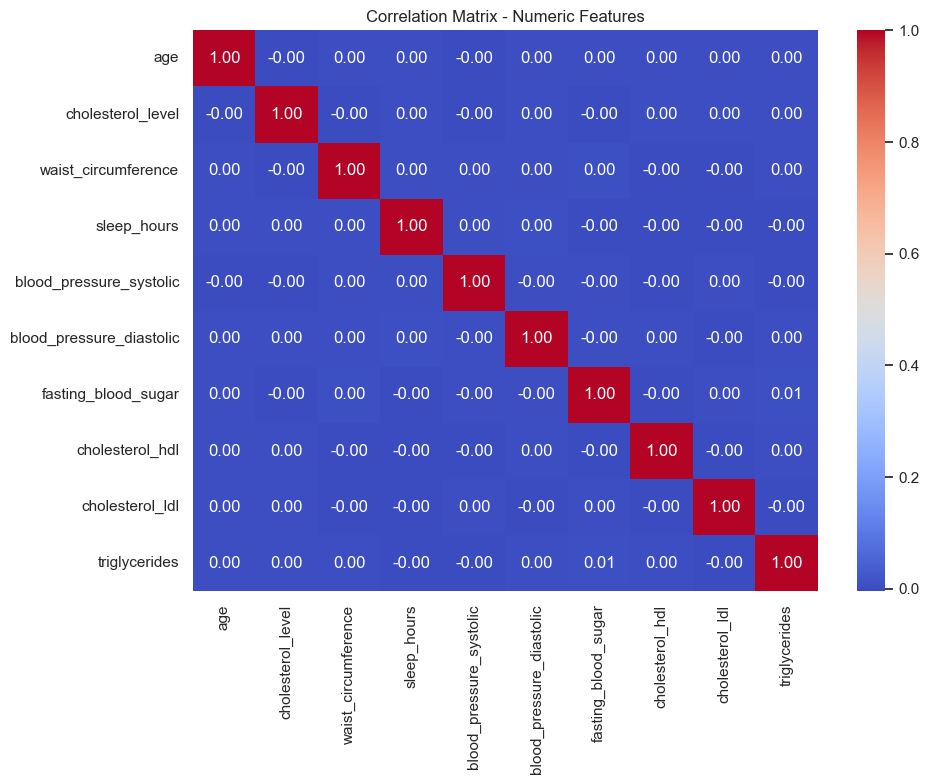

In [21]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_no_outliers[numeric_features].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix - Numeric Features')
plt.tight_layout()
plt.show()


**Insight**
- Tidak ada korelasi tinggi antar fitur numerik, yang terlihat dari nilai korelasi mendekati 0.
- Korelasi tertinggi terjadi antara:
    - blood_pressure_systolic dan blood_pressure_diastolic: ~0.5
    - cholesterol_level dan cholesterol_ldl: ~0.4
- Sebagian besar fitur berdistribusi independen, artinya masing-masing bisa menyumbang informasi unik ke dalam model prediksi.

<h1> Data Preparation

In [22]:
from sklearn.preprocessing import OneHotEncoder

# Buat encoder
ohe = OneHotEncoder(drop='first', sparse_output=False)

# Encode fitur kategorikal dari df_no_outliers
encoded_cat = ohe.fit_transform(df_no_outliers[categorical_features])

# Buat DataFrame hasil encoding dengan menggunakan indeks dari df_no_outliers
encoded_cat_df = pd.DataFrame(encoded_cat, columns=ohe.get_feature_names_out(categorical_features), index=df_no_outliers.index)

encoded_cat_df.head()

,gender_Male,smoking_status_Never,smoking_status_Past,physical_activity_Low,physical_activity_Moderate,dietary_habits_Unhealthy,air_pollution_exposure_Low,air_pollution_exposure_Moderate,stress_level_Low,stress_level_Moderate,hypertension_1,diabetes_1,obesity_1,previous_heart_disease_1,medication_usage_1
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


**Insight**
- Kode tersebut mengubah fitur-fitur kategorikal Anda menjadi format angka (0 dan 1) yang bisa diproses oleh model machine learning. Ini dilakukan dengan membuat kolom-kolom baru untuk setiap kategori unik, dan drop='first' membantu menghindari masalah data yang berlebihan (multikolinearitas). Penggunaan indeks dari df_no_outliers memastikan data yang di-encode tetap sinkron dengan data numerik Anda setelah penanganan outlier.

In [23]:
X_raw = pd.concat([df_no_outliers[numeric_features], encoded_cat_df], axis=1)
y = df_no_outliers['heart_attack'].astype(int)

**Insight**
- X_raw = pd.concat(...): Baris ini menggabungkan semua fitur yang akan digunakan untuk melatih model. Ini mengambil fitur-fitur numerik (yang sudah bersih dari outlier dari df_no_outliers) dan fitur-fitur kategorikal yang sudah diubah menjadi format angka (dari encoded_cat_df), lalu menyatukannya menjadi satu tabel besar (X_raw). X_raw inilah yang akan menjadi input (variabel independen) bagi model machine learning.
- y = df_no_outliers['heart_attack'].astype(int): Baris ini menyiapkan variabel target (y) yang ingin diprediksi, yaitu kolom 'heart_attack'. Ini diambil dari DataFrame yang sama (df_no_outliers) untuk memastikan konsistensi jumlah data dengan X_raw. Fungsi .astype(int) memastikan target dalam format angka integer (misalnya, 0 dan 1), yang merupakan format standar untuk tugas klasifikasi.

In [24]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y, test_size=0.2, random_state=42, stratify=y
)

**Insight**
- Baris kode ini adalah langkah krusial dalam machine learning yang membagi dataset menjadi dua bagian terpisah: satu untuk "melatih" model (X_train_raw, y_train) dan satu lagi untuk "menguji" seberapa baik model tersebut bekerja pada data baru yang belum pernah dilihatnya (X_test_raw, y_test).

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)

**Insight**
- Melakukan standardisasi fitur pada data latih dan data uji. Tujuannya adalah untuk mengubah skala semua fitur numerik sehingga memiliki rata-rata 0 dan standar deviasi 1. Ini adalah langkah preprocessing yang penting karena banyak algoritma machine learning bekerja lebih baik atau lebih stabil ketika fitur-fitur berada pada skala yang serupa.

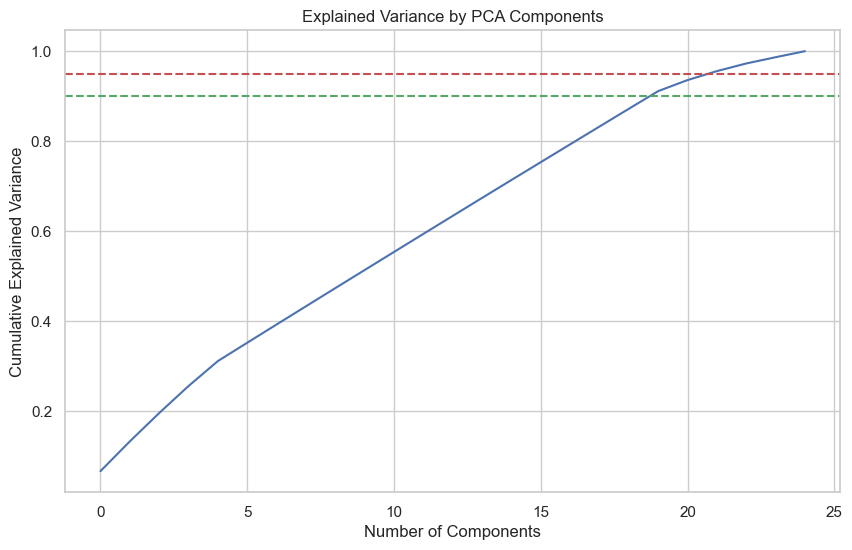

In [26]:
pca_full = PCA().fit(X_train_scaled)
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--') # Garis untuk 95% varians
plt.axhline(y=0.90, color='g', linestyle='--') # Garis untuk 90% varians
plt.show()

**Insight**
- Plot ini menunjukkan seberapa banyak informasi (atau varians) dari dataset asli Anda yang dapat dipertahankan oleh sejumlah tertentu komponen utama hasil PCA.
- Singkatnya, plot ini adalah panduan visual yang sangat berguna untuk memilih jumlah komponen PCA yang "cukup baik" – yaitu jumlah yang menyeimbangkan antara pengurangan dimensi (untuk efisiensi dan potensi pengurangan noise) dan retensi informasi (untuk menjaga performa model). Berdasarkan plot ini, menggunakan antara 16 hingga 21 komponen akan menjadi pilihan yang jauh lebih baik untuk melatih model

In [27]:
n_components_optimal = 21 # Misalnya, untuk ~95% varians
pca_optimal = PCA(n_components=n_components_optimal)

# Asumsi X_train_scaled dan X_test_scaled sudah ada dari langkah sebelumnya
X_train_pca_optimal = pca_optimal.fit_transform(X_train_scaled)
X_test_pca_optimal = pca_optimal.transform(X_test_scaled)

print(f"Shape X_train setelah PCA optimal: {X_train_pca_optimal.shape}")
print(f"Shape X_test setelah PCA optimal: {X_test_pca_optimal.shape}")
print(f"Total explained variance dengan {n_components_optimal} komponen: {pca_optimal.explained_variance_ratio_.sum():.4f}")

Shape X_train setelah PCA optimal: (120539, 21)
Shape X_test setelah PCA optimal: (30135, 21)
Total explained variance dengan 21 komponen: 0.9358


**Insight**
- Setelah melakukan analisis terhadap plot kumulatif explained variance ratio, diputuskan untuk menggunakan 21 komponen utama (principal components) untuk mereduksi dimensi dataset. Proses PCA kemudian diterapkan pada data latih (X_train_scaled) dan data uji (X_test_scaled) menggunakan jumlah komponen optimal ini.
- Output dari proses PCA menunjukkan hasil sebagai berikut:
    - Shape X_train setelah PCA optimal (X_train_pca_optimal): (120539, 21)
    - Shape X_test setelah PCA optimal (X_test_pca_optimal): (30135, 21)
    - Total explained variance dengan 21 komponen: 0.9358

<h1> Modelling

In [28]:
# --- 1. Logistic Regression ---
# Model dilatih menggunakan X_train_pca dan y_train
logreg_balanced = LogisticRegression(class_weight='balanced', max_iter=1000) # Peningkatan max_iter mungkin diperlukan
logreg_balanced.fit(X_train_pca_optimal, y_train)

# Prediksi dilakukan pada X_test_pca
y_pred_logreg_test = logreg_balanced.predict(X_test_pca_optimal)

print("Logistic Regression dengan class_weight='balanced' (Evaluasi pada Data Uji):")
# Evaluasi menggunakan y_test dan prediksi pada data uji
print(classification_report(y_test, y_pred_logreg_test))
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg_test):.4f}")
print("-" * 60)

Logistic Regression dengan class_weight='balanced' (Evaluasi pada Data Uji):
              precision    recall  f1-score   support

           0       0.77      0.71      0.74     18108
           1       0.61      0.69      0.65     12027

    accuracy                           0.70     30135
   macro avg       0.69      0.70      0.69     30135
weighted avg       0.71      0.70      0.70     30135

Accuracy: 0.7020
------------------------------------------------------------


**Insight**
- Hasil:
    - Akurasi: 70.20%
    - Recall Kelas 1 (positif/heart attack): 71%
    - Recall Kelas 0 (negatif/tidak heart attack): 69%
    - F1-Score Kelas 1: 65%
    - F1-Score Kelas 0 : 74%
- Interpretasi:
    - Logistic Regression cukup baik dalam mengenali kasus heart attack (kelas 1), dengan recall 69%.
    - Akurasi keseluruhan cukup baik(70.20%).

In [29]:
from sklearn.neighbors import KNeighborsClassifier

# --- 2. K-Nearest Neighbors (KNN) ---
# Model dilatih menggunakan X_train_pca dan y_train
knn_model = KNeighborsClassifier() # Mengganti nama variabel
knn_model.fit(X_train_pca_optimal, y_train)

# Prediksi dilakukan pada X_test_pca
y_pred_knn_test = knn_model.predict(X_test_pca_optimal)

print("K-Nearest Neighbors (Evaluasi pada Data Uji):")
# Evaluasi menggunakan y_test dan prediksi pada data uji
print(classification_report(y_test, y_pred_knn_test))
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn_test):.4f}")
print("-" * 60)

K-Nearest Neighbors (Evaluasi pada Data Uji):
              precision    recall  f1-score   support

           0       0.71      0.79      0.75     18108
           1       0.63      0.52      0.57     12027

    accuracy                           0.69     30135
   macro avg       0.67      0.66      0.66     30135
weighted avg       0.68      0.69      0.68     30135

Accuracy: 0.6861
------------------------------------------------------------


**Insight**
- Akurasi Keseluruhan: 68.61%
- Kelas 1 (Serangan Jantung):
    - Precision: 0.63
    - Recall: 0.52
    - F1-score: 0.57
-Kelas 0 (Tidak Serangan Jantung):
    - Precision: 0.71
    - Recall: 0.79
    - F1-score: 0.75
- Interpretasi:
    - Model KNN mencapai akurasi sekitar 68.61% pada data uji. Ini menunjukkan bahwa model secara keseluruhan dapat memprediksi dengan benar sekitar 68-69% dari total kasus.    
    - Model ini menunjukkan performa yang lebih baik untuk kelas 0 (tidak serangan jantung), dengan precision 0.71 dan recall 0.79. Ini berarti model cukup baik dalam mengidentifikasi pasien yang tidak mengalami serangan jantung dan juga cukup akurat ketika membuat prediksi tersebut.
    - Ada perbedaan performa antara kelas 0 dan kelas 1. Model lebih baik dalam mengidentifikasi dan memprediksi kelas 0 dibandingkan kelas 1. Hal ini terlihat dari recall kelas 1 (0.52) yang lebih rendah dibandingkan recall kelas 0 (0.79).

In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# 3. XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42) # Tambahkan random_state untuk reproduktifitas
print("Memulai pelatihan XGBoost Classifier...")

xgb_model.fit(X_train_pca_optimal, y_train)
print("Pelatihan XGBoost Classifier selesai.")

y_pred_xgb_test = xgb_model.predict(X_test_pca_optimal)

print("\nXGBoost Classifier (Evaluasi pada Data Uji):")
print(classification_report(y_test, y_pred_xgb_test))
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb_test):.4f}")
print("-" * 60) 

c:\Users\DELL\.conda\envs\python10\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Memulai pelatihan XGBoost Classifier...
Pelatihan XGBoost Classifier selesai.

XGBoost Classifier (Evaluasi pada Data Uji):
              precision    recall  f1-score   support

           0       0.75      0.81      0.78     18108
           1       0.67      0.59      0.63     12027

    accuracy                           0.72     30135
   macro avg       0.71      0.70      0.70     30135
weighted avg       0.72      0.72      0.72     30135

Accuracy: 0.7216
------------------------------------------------------------


**Insight**
- Akurasi Keseluruhan: 72.16%
- Kelas 1 (Serangan Jantung):
    - Precision: 0.67
    - Recall: 0.59
    - F1-score: 0.63
-Kelas 0 (Tidak Serangan Jantung):
    - Precision: 0.75
    - Recall: 0.81
    - F1-score: 0.78
- Interpretasi:
    - Dengan akurasi 72.16%, model XGBoost Anda menunjukkan performa keseluruhan tertinggi dibandingkan dengan Logistic Regression (~70.2%) dan KNN (~68.6%) yang sebelumnya dievaluasi pada data yang sama (21 komponen PCA). Ini adalah hasil yang menjanjikan
    - Recall (Sensitivitas) untuk Kelas 1 adalah 0.59: Ini berarti model XGBoost berhasil mengidentifikasi 59% dari semua pasien yang sebenarnya mengalami serangan jantung. Angka ini lebih baik daripada KNN (0.52) tetapi masih sedikit di bawah Logistic Regression (0.69) yang menggunakan class_weight='balanced'. Meskipun demikian, ini adalah peningkatan yang baik jika dibandingkan dengan performa model-model awal Anda.
    - Precision untuk Kelas 1 adalah 0.67: Dari semua pasien yang diprediksi oleh XGBoost akan mengalami serangan jantung, 67% di antaranya memang benar mengalami serangan jantung. Ini adalah nilai precision tertinggi untuk kelas 1 di antara ketiga model yang telah kita bahas dengan 21 komponen PCA. Ini menunjukkan bahwa ketika XGBoost memprediksi "serangan jantung", prediksinya relatif lebih dapat diandalkan (lebih sedikit false positive untuk kelas 1 dibandingkan model lain).
    - F1-score untuk Kelas 1 adalah 0.63: Ini adalah skor keseimbangan yang cukup baik untuk kelas 1, sedikit di bawah F1-score Logistic Regression (0.65).
    - Model ini juga menunjukkan performa yang solid untuk kelas 0 (tidak serangan jantung), dengan precision 0.75 dan recall 0.81.
    - XGBoost tampaknya menawarkan keseimbangan yang baik antara kemampuan mengidentifikasi kedua kelas, dengan metrik yang relatif kuat baik untuk kelas 0 maupun kelas 1, terutama pada precision.

In [32]:
from sklearn.svm import LinearSVC # Impor LinearSVC
from sklearn.metrics import classification_report, accuracy_score
import time 

# --- LinearSVC ---
# LinearSVC mungkin juga memerlukan lebih banyak iterasi untuk konvergen.
linear_svm_model = LinearSVC(random_state=42, C=1.0, max_iter=2000, verbose=1, dual=False) # Ubah dual="auto" menjadi dual=False

print("Memulai pelatihan LinearSVC...")
start_time_linear = time.time()

# Model dilatih menggunakan X_train_pca_optimal dan y_train
linear_svm_model.fit(X_train_pca_optimal, y_train)

end_time_linear = time.time()
print(f"Pelatihan LinearSVC selesai dalam {end_time_linear - start_time_linear:.2f} detik.")

# Prediksi dilakukan pada X_test_pca_optimal
y_pred_linear_svm_test = linear_svm_model.predict(X_test_pca_optimal)

print("\nLinearSVC (Evaluasi pada Data Uji):")
# Evaluasi menggunakan y_test dan prediksi pada data uji
print(classification_report(y_test, y_pred_linear_svm_test))
print(f"Accuracy: {accuracy_score(y_test, y_pred_linear_svm_test):.4f}")
print("-" * 60)

Memulai pelatihan LinearSVC...
[LibLinear]Pelatihan LinearSVC selesai dalam 0.84 detik.

LinearSVC (Evaluasi pada Data Uji):
              precision    recall  f1-score   support

           0       0.73      0.83      0.78     18108
           1       0.68      0.54      0.60     12027

    accuracy                           0.72     30135
   macro avg       0.71      0.69      0.69     30135
weighted avg       0.71      0.72      0.71     30135

Accuracy: 0.7172
------------------------------------------------------------


**Insight**
- Akurasi Keseluruhan: 71.72%
- Kelas 1 (Serangan Jantung):
    - Precision: 0.68
    - Recall: 0.54
    - F1-score: 0.60
- Kelas 0 (Tidak Serangan Jantung):
    - Precision: 0.73
    - Recall: 0.83
    - F1-score: 0.

**Interpretasi**
- Kecepatan Pelatihan Luar Biasa:
    - Yang pertama dan paling mencolok adalah waktu pelatihan yang hanya 0.84 detik! Ini menunjukkan betapa efisiennya LinearSVC untuk dataset dengan jumlah sampel yang cukup besar seperti milik Anda, terutama dibandingkan dengan SVC(kernel='linear') yang memakan waktu sangat lama. Ini adalah keuntungan besar jika Anda perlu melakukan banyak iterasi atau tuning.
- Performa Keseluruhan yang Kompetitif:
    - Dengan akurasi 71.72%, LinearSVC menunjukkan performa yang sangat bersaing, sedikit di bawah XGBoost (72.16%) dan sedikit di atas Logistic Regression (70.20%) pada dataset dan konfigurasi PCA yang sama ini (kemungkinan dengan parameter default untuk LinearSVC).
- Kemampuan Mengidentifikasi Serangan Jantung (Kelas 1):
    - Precision untuk Kelas 1 adalah 0.68: Ini adalah nilai precision tertinggi untuk kelas 1 di antara semua model yang telah kita evaluasi sejauh ini (XGBoost 0.67, KNN 0.63, Logistic Regression 0.61). Artinya, ketika LinearSVC memprediksi seseorang mengalami "serangan jantung", prediksi tersebut memiliki tingkat kebenaran yang paling tinggi (68% benar). Ini bagus untuk meminimalkan false positive pada kelas 1.
    - Recall (Sensitivitas) untuk Kelas 1 adalah 0.54: Model ini berhasil mengidentifikasi 54% dari semua kasus serangan jantung yang sebenarnya. Angka ini lebih baik dari KNN (0.52), tetapi masih di bawah XGBoost (0.59) dan terutama Logistic Regression (0.69). Ini berarti model ini masih melewatkan sekitar 46% kasus serangan jantung aktual.
    - F1-score untuk Kelas 1 adalah 0.60: Ini adalah skor keseimbangan yang moderat, mencerminkan trade-off antara precision yang tinggi dan recall yang lebih rendah untuk kelas 1.
- Performa Baik pada Kelas Bukan Serangan Jantung (Kelas 0):
    - Model ini menunjukkan performa yang kuat untuk kelas 0, dengan precision 0.73 dan recall 0.83.